---
# <center> Master M2 MVA - Computational Statistics
    
# <center> TP 2: Expectation-Maximisation algorithm – Importance sampling
    
<center> Realized By: Eya Ghamgui
<center> eya.ghamgui@telecom-paris.fr
    
--- 

## Import Libraries

In [1]:
import scipy 
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")

## Ecercice 1: Discrete Distributions

Let $n \in \mathbb{N}^*$ and $X = \{x_1,...,x_n\}$ a set of n distinct real numbers. Let $(p_i)_{i \in [1,n]}$ a sequence of real numbers such that: 

$$ \forall i \in [1,n], p_i > 0 ~~ \text{and}~~ \sum_{i=1}^n p_i = 1$$

<font color = 'red'>1.  Explain how to generate a random variable $X $ having the discrete distribution on $X$ given by $(p_i)_{i \in [1,n]}$:<br><br>
$$ \forall i \in [1,n], P(X = x_i ) = p_i$$ 

> The inverse sampling is one of the methods used to generate samples randomly from any probability distribution given its cumulative distribution. It takes uniform samples between 0 and 1, and then returns the largest number $x$ from the domain of the distribution $P(X)$ such that $  P(-\infty <X<x)\leq u$.
<br><br>
> Let's take here $X$ a random variable and $F$ its cumulative distribution. 
<br><br>
> The generalized inverse: $$\begin{aligned} F^{-1} : 
& ]0,1[ \rightarrow \mathbb{R} \\
& ~~ u ~~~~\rightarrow ~\text{inf} \{x \in \mathbb{R} ~~ st ~~ F(x) \geq u\} 
\end{aligned}$$
<br><br>
> Let's take $ u \sim \mathbb{u}[0,1]$.
<br><br>
> Then, $X = F^{-1}(u) \Longrightarrow X \sim F $. 
<br><br>
> Having $X \sim F $ and $F  \in \mathbb{C}^0$, then $F(x) \sim \mathbb{u}([0,1])$. 
<br><br>
> **To determine the samples:**
<br><br>
>   - We compute the cumulative distribution. 
>   - We take uniform random samples. 
>   - We finish by calculating $x_i = F^{-1}(u_i)$.
    

<font color = 'red'> 2. Write the corresponding algorithm 

In [2]:
def discrete_random_var(n, p) : 
    
    sample = [] 
    u = np.random.uniform(0,1,n)
    F = [*[0.0], *np.cumsum(p)] 
    
    for i in range(n): 
        sample.append(np.where(F <= u[i])[0][-1])

    return(sample)

<font color = 'red'> 3. Generate a sequence $(X_i)_{i\in ]1,N [}$ of i.i.d. random variables having the same distribution as $X$ for large values of $N$. Compare the empirical distribution to the theoretical distribution of $X$. 

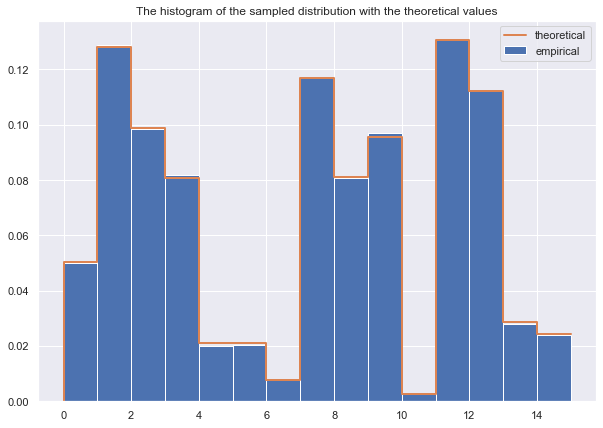

In [3]:
# Number of samples 
n = 100000

# Random probability vector 
np.random.seed(42) 
list_of_random_floats = np.random.random(15) 
p = list_of_random_floats / list_of_random_floats.sum()

# Generate samples 
sample = discrete_random_var(n,p)

# Plot the histogram 
plt.figure(figsize=(10,7))
h = plt.hist(sample,range(0,len(p)+1),density = True , label = 'empirical')
plt.title('The histogram of the sampled distribution with the theoretical values')
plt.step([*[0.0], *np.arange(0,len(p))+ 1 ] , [*[0.0], *p], label= 'theoretical' , linewidth = 2)
plt.legend()
plt.show() 

**Interpretation:** 

> The empirical and theoretical values are very close to each other. The orange graph corresponds to the theoretical values and the blue histogram corresponds to the empirical values. Moreover, when we increase the number of samples, we get closer to the theoretical distribution. If we take a small number of samples, we get a small gap between the empirical and theoretical values.

## Exercice 2: Gaussian mixture model and the EM algorithm

Let consider a n-sample. For each individual, we observe a random variable $X_i$ and assume there is
an unobserved variable $Z_i$ for each person which encodes the class of $X_i$. More formally, we consider a mixture of $m$ Gaussians: let $(\alpha_1,...,\alpha_m) \in \mathbb{R}_+^m$ such that $\sum_{i=1}^m \alpha_i = 1 $ and the following hierarchical model:

$$\forall i \in [1,n], \forall j \in [1,m], \mathbb{P}_\theta(Z_i = j) = \alpha_j $$
and 
$$\forall i \in [1,n], \forall j \in [1,m], X_i | \theta, \{ Z_i = j \} \sim \mathcal{N} (\mu_j,\Sigma_j) $$

<font color = 'red'> 1. Identify the parameters, denoted $\theta$, of the model and write down the likelihood of $\theta$ given the outcomes $(x_i)_{i\in ]1,n[}$ of the i.i.d n-sample $(X_i)_{i\in ]1,n[}$, i.e the p.d.f
    
$$\mathcal{L}(x_1,...,x_n ; \theta) = \prod_{i = 1}^n f_\theta (x_i)  $$ 
  

> The parameters: $\theta=(\alpha_{1},\alpha_{2},...,\alpha_{m},\mu_{1},...,\mu_{m},\Sigma_{1},...,\Sigma_{m})$
<br><br>
> $\begin{aligned}
\mathcal{L}(x_1,...,x_n ; \theta) & = \prod_{i = 1}^n f_\theta (x_i)   \\
& = \prod_{i = 1}^n \sum_{j = 1 }^m f_\theta (x_i | z_i = j) p(z_i = j) \\ 
& = \prod_{i = 1}^n \sum_{j = 1 }^m  \alpha_j \phi(x_i , \mu_j , \Sigma_j) 
\end{aligned}$
<br><br>
> Where $\phi(x_i , \mu_j , \Sigma_j)$ is the density of a multivariate normal distribution with parameters $\mu_j,\Sigma_j$.

<font color = 'red'> 2. Sample a set of observation according to a Gaussian mixture law, with the parameters of your choice. Use the hierarchical model and the first exercise.

In [4]:
# Parameters chosen randomly
n = 2000
m = 3

# Uniform distribution
alpha = np.ones(m) / m

# Random means 
mu = np.array([[0,0],[5,7],[10,0]])

# Sigma 
l = []
sigma = np.eye(2)    
for i in range(m):
    l.append(sigma) 
sigma = np.array(l)

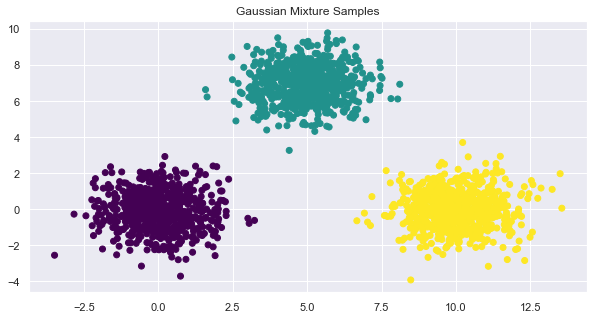

In [5]:
sample_gauss = [] 
label = []
    
# Use the model in exercise 1
sample = discrete_random_var(n, alpha)
    
# Use the hierarchical model
for x in sample: 
    sample_gauss.append(np.random.multivariate_normal(mu[int(x)], sigma[int(x)]))
    label.append(int(x))

sample_gauss = np.array(sample_gauss)

# Visualize the results
plt.figure(figsize=(10,5))
plt.scatter(sample_gauss[:,0], sample_gauss[:,1] , c= label , cmap = 'viridis')
plt.title('Gaussian Mixture Samples')
plt.show()

<font color = 'red'> 3. Implement the EM algorithm in order to estimate the parameters of this model from your observations and plot the log-likelihood over the number of iterations of the algorithm.

> The EM algorithm: 
> - **The E-step:** <br>
> Calculate for each data point $x_i$ the probability $r_{ic}$ that that datapoint belongs to cluster c with: $$r_{ic} = \frac{\alpha_c \phi(x_i | \mu_c,\Sigma_c)}{\sum_{k=1}^K \alpha_k \phi(x_i | \mu_k,\Sigma_k)}$$  <br><br>
Where: $\phi(x|\mu, \Sigma)$ describes the mulitvariate Gaussian.  <br><br>
<br><br>
> - **The M-step:** <br> 
>For each cluster c, calculate:  <br><br>
>    - $\alpha_c = \frac{\sum_i r_{ic}}{\sum_c \sum_i r_{ic}}$  <br><br>
>    - $\mu_c = \frac{\sum_i r_{ic}x_i}{\sum_i r_{ic}}$ <br><br>
>    - $\Sigma_c = \frac{\sum_i r_{ic} (x_i - \mu_c)^T(x_i - \mu_c)}{\sum_i r_{ic}}$
>
>
> In addition, I used the initialization provided in this link page 4: https://perso.telecom-paristech.fr/bonald/documents/gmm.pdf

In [6]:
def Loglikelihood(X, alpha, mu, sigma):
    
    aux = np.zeros((X.shape[0], alpha.shape[0]))

    for j in range(alpha.shape[0]):
        f = scipy.stats.multivariate_normal.pdf(X, mu[j], sigma[j] , allow_singular =True)
        aux[:,j] = alpha[j] * f
        
    y = np.log(np.sum(aux, axis = 1))
    
    return np.sum(y)
    
    
def E_step (X, alpha, mu, sigma) : 
    
    aux = np.zeros((X.shape[0], alpha.shape[0]))
    
    for j in range(alpha.shape[0]):
        f = scipy.stats.multivariate_normal.pdf(X, mu[j], sigma[j] , allow_singular =True)
        aux[:,j] = alpha[j] * f
    
    aux = aux/aux.sum(axis =1).reshape(-1,1)

    return aux 
        
    
def M_step (X, aux) :
    
    ## compute alpha 
    alpha = np.sum(aux, axis = 0)
    
    ## compute mu 
    mu = []
    for c in range(aux.shape[1]) : 
        mu.append(np.sum(aux[:,c].reshape(-1,1)*X, axis = 0)/alpha[c])
    mu = np.array(mu)
    
    ## compute sigma
    sigma = [] 
    for c in range(aux.shape[1]) :
        sig  = ((aux[:,c].reshape(-1,1)*(X-mu[c])).T@(X-mu[c]))/alpha[c]
        sigma.append(sig)
    sigma = np.array(sigma)
        
    ## Normalize alpha 
    alpha /= np.sum(alpha)
        
    return alpha, mu, sigma
  
    
def EM (X, n, m, n_iter):

    ## Initialize alpha 
    alpha = np.ones(m) / m
    
    ## Initialize mu 
    np.random.seed(0)
    mu = X[np.random.randint(0,n,m)]

    ## Initialize sigma 
    l = []
    
    x_bar = np.mean(X, axis = 0)
    sigma_2 = np.mean((X-x_bar).T @ (X-x_bar))
    sigma = np.eye(2)    
    
    for i in range(m):
        l.append(sigma * sigma_2 / m) 
    sigma = np.array(l)   

    loglikelihood = [Loglikelihood(X, alpha, mu, sigma)]
        
    # Iterations 
    for i in range(n_iter):  
        aux = E_step(X, alpha, mu, sigma)
        alpha, mu, sigma = M_step(X, aux)   
        loglikelihood.append(Loglikelihood(X, alpha, mu, sigma))

    return alpha, mu, sigma, loglikelihood     

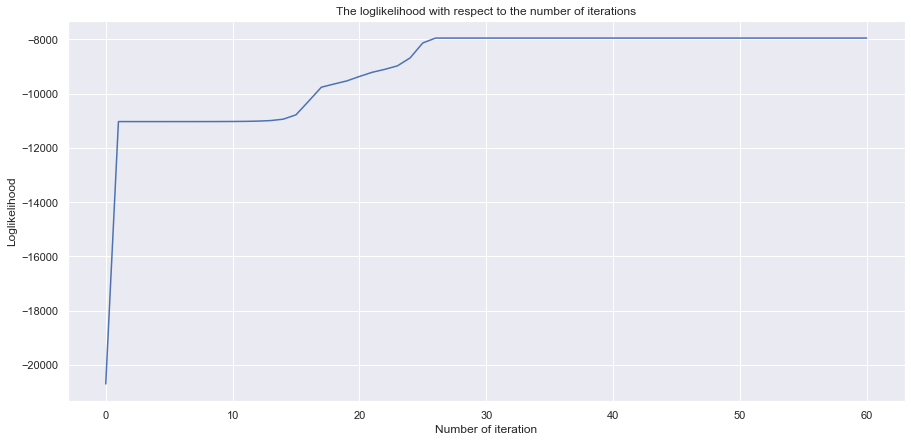

In [7]:
# Apply EM algorithm 
alpha_em, mu_em, sigma_em, loglikelihood  = EM(sample_gauss,n,len(alpha), 60)

# Plot the results 
plt.figure(figsize=(15,7))
plt.plot(loglikelihood)
plt.ylabel('Loglikelihood')
plt.xlabel('Number of iteration')
plt.title('The loglikelihood with respect to the number of iterations')

plt.show()

**Interpretation:**

> The algorithm converges to the optimal solution after about 25 iterations. 

<font color = 'red'> 4. Are the estimated parameters far from the original ones ?

In [8]:
for i in range(alpha.shape[0]):
    print('\n*** For Gaussian ',i+1,':')
    print('The original mu : ', mu[i])
    print('The estimated mu : ', mu_em[i])
    print('The original alpha : ', alpha[i])
    print('The estimated alpha : ', alpha_em[i])
    print('The original sigma :\n ', sigma[i])
    print('The estimated sigma :\n ', sigma_em[i])


*** For Gaussian  1 :
The original mu :  [0 0]
The estimated mu :  [ 0.03756974 -0.07479012]
The original alpha :  0.3333333333333333
The estimated alpha :  0.3310000423109733
The original sigma :
  [[1. 0.]
 [0. 1.]]
The estimated sigma :
  [[ 0.97478346 -0.03572922]
 [-0.03572922  1.0961517 ]]

*** For Gaussian  2 :
The original mu :  [5 7]
The estimated mu :  [4.97123226 6.98041266]
The original alpha :  0.3333333333333333
The estimated alpha :  0.33649996682195255
The original sigma :
  [[1. 0.]
 [0. 1.]]
The estimated sigma :
  [[0.98283133 0.04163048]
 [0.04163048 1.04127598]]

*** For Gaussian  3 :
The original mu :  [10  0]
The estimated mu :  [ 1.00290791e+01 -8.39563394e-03]
The original alpha :  0.3333333333333333
The estimated alpha :  0.3324999908670741
The original sigma :
  [[1. 0.]
 [0. 1.]]
The estimated sigma :
  [[1.08463969 0.03773857]
 [0.03773857 1.09531174]]


**Interpretation:**

> From the previous results, we can say that the algorithm converges to the optimal solution. The EM algorithm is able to estimate the parameters of the Gaussians. We can clearly notice that all the estimated parameters of each Gaussian are very close to the original parameters. We can say that this algorithm is efficient in estimating the parameters of a GMM.

<font color = 'red'> 5. Download the data Crude Birth/Death Rate – See esa.un.org/unpd/wpp/ for
instance – and plot the associated scatter graph. What do you think about using a Gaussian
mixture model ?

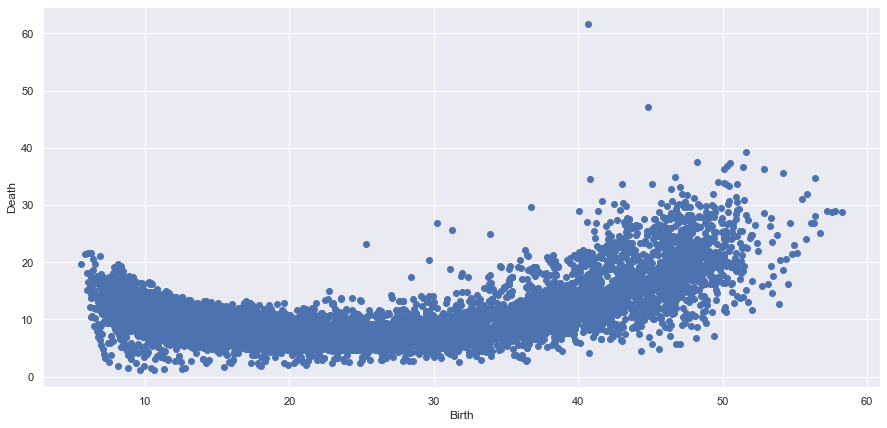

In [9]:
# Download the data 
data = pd.read_csv('WPP2019_Period_Indicators_Medium.csv')[['CBR','CDR']].dropna()
X = np.array(data)

# Plot the associated scatter graph
plt.figure(figsize=(15,7))
plt.scatter(X[:,0],X[:,1])
plt.ylabel('Death')
plt.xlabel('Birth')
plt.show()

**Interpretation:**

> There is no particular pattern in the data. That is, modeling this data using a mixture of Gaussian distributions is a good idea. This data can be interpreted as a sum of several Gaussian distributions. Furthermore, this data is a combination of data from different countries, so each country can correspond to a Gaussian.

<font color = 'red'> 6. Estimate the parameters θ for different values of m, try to interpret them and compute the BIC. Plot the corresponding p.d.f over the scatter plot. (In Python, you can use plt.contour).

In [10]:
# Degrees of freedon function 
def df(m):
    return 2*m + 4 *m + m 


# Plot the clusters 
def plot (X,mu,sigma,k,xmin ,xmax , ymin , ymax ):
    
    plt.figure(figsize=(15,7))
    x = np.linspace(xmin, xmax)
    y = np.linspace(ymin, ymax)
    V, W = np.meshgrid(x, y)
    
    # Plot the data 
    plt.scatter(X[:,0], X[:,1], marker='o') 
    plt.ylabel('Death')
    plt.xlabel('Birth')
    
    for j in range(int(k)): 
        
        # Plot distributions 
        Z = - scipy.stats.multivariate_normal.pdf(np.array([V.ravel(), W.ravel()]).T, mu[j], sigma[j] , allow_singular =True)
        Z = Z.reshape(V.shape)
        plt.contour(V,W, Z)
       
    plt.show()

 ****  For number of clusters = 2
The estimated mu : 
 [[34.60615809 11.98356918]
 [12.90438797  9.9410382 ]]

 The estimated alpha : 
 [0.37478289 0.62521711]

 The estimated sigma :
  [[[89.88184411 45.96525783]
  [45.96525783 39.78434282]]

 [[14.92920441 -7.72356376]
  [-7.72356376  7.23893773]]]


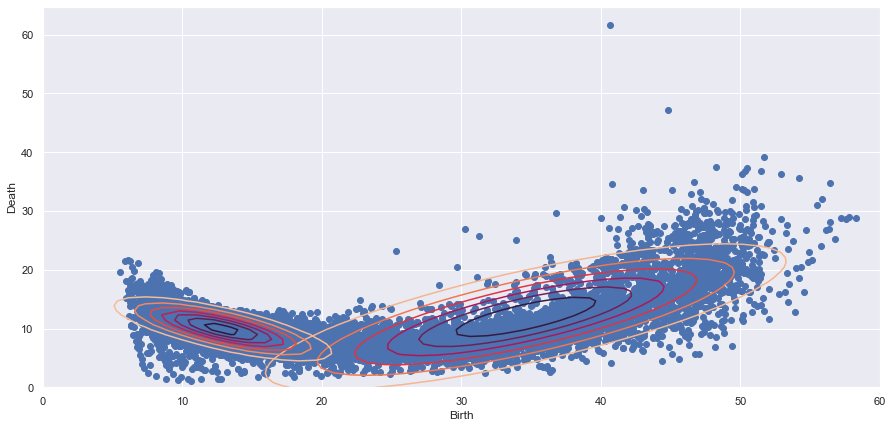

 ****  For number of clusters = 3
The estimated mu : 
 [[19.32568754  7.69513582]
 [10.27750516 11.55993435]
 [41.00587598 15.22009823]]

 The estimated alpha : 
 [0.431981   0.34504291 0.22297609]

 The estimated sigma :
  [[[33.87321942 -2.54892356]
  [-2.54892356  3.3801292 ]]

 [[ 2.36798156 -2.44124514]
  [-2.44124514  4.8132744 ]]

 [[35.00444015 24.99445965]
  [24.99445965 38.48746104]]]


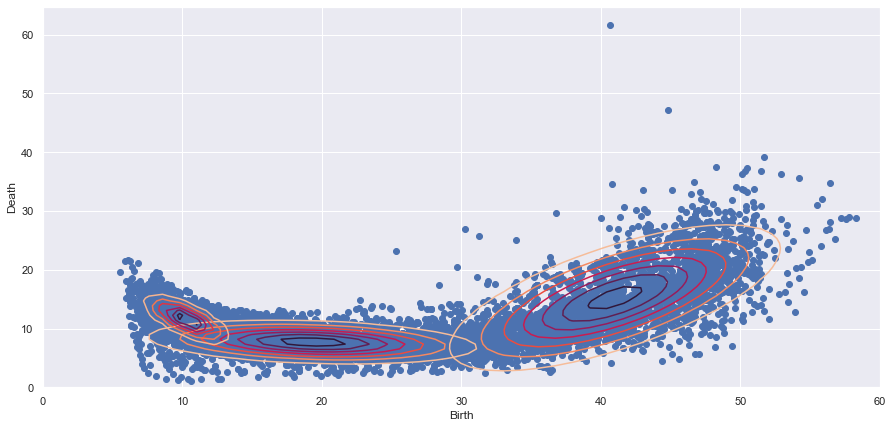

 ****  For number of clusters = 4
The estimated mu : 
 [[26.05727449  7.5954377 ]
 [ 9.87842863 11.93370474]
 [43.13840612 17.17881174]
 [14.97064368  8.60069486]]

 The estimated alpha : 
 [0.24652766 0.27403727 0.16790443 0.31153065]

 The estimated sigma :
  [[[46.67766344  5.88151224]
  [ 5.88151224  4.43680719]]

 [[ 1.47640426 -1.92805315]
  [-1.92805315  4.69135297]]

 [[22.90656351 15.66047337]
  [15.66047337 34.04152349]]

 [[12.20923175 -3.72766612]
  [-3.72766612  3.54686382]]]


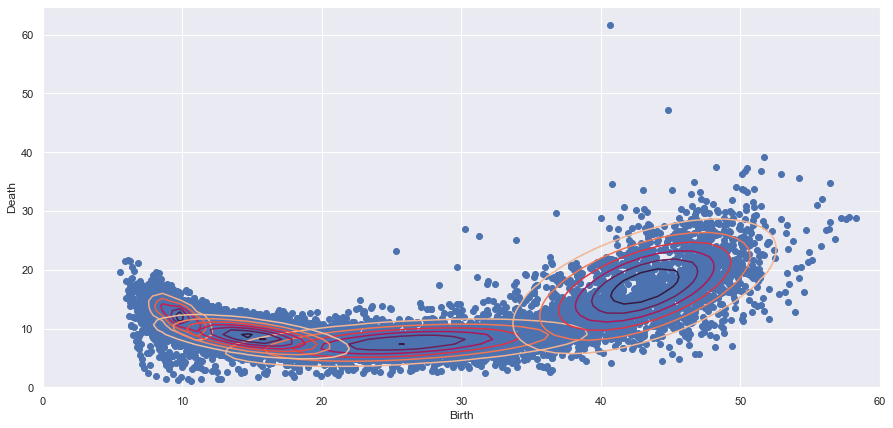

 ****  For number of clusters = 5
The estimated mu : 
 [[27.88031307  8.31404922]
 [ 9.79151358 12.03725965]
 [43.56075021 17.78451745]
 [13.81139346  9.2195908 ]
 [20.52818648  6.73253179]]

 The estimated alpha : 
 [0.19793275 0.25669996 0.15166462 0.25052052 0.14318214]

 The estimated sigma :
  [[[62.36337359  9.58182124]
  [ 9.58182124  6.22857518]]

 [[ 1.33268587 -1.81966559]
  [-1.81966559  4.56866654]]

 [[21.1817045  14.48784588]
  [14.48784588 33.26013537]]

 [[ 8.71749687 -2.71805964]
  [-2.71805964  3.31558356]]

 [[24.4742113  -1.66871041]
  [-1.66871041  0.92613395]]]


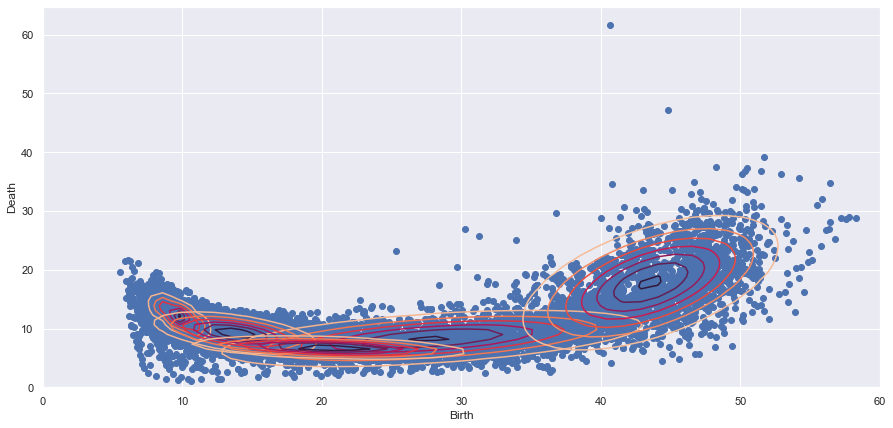

 ****  For number of clusters = 6
The estimated mu : 
 [[29.26877391  8.42841631]
 [ 9.7535378  12.05744748]
 [43.68519618 17.96426635]
 [15.69775375  9.1321954 ]
 [20.5332499   6.72234109]
 [13.02524519  9.39016935]]

 The estimated alpha : 
 [0.17969029 0.24522103 0.14640745 0.11543816 0.1463408  0.16690228]

 The estimated sigma :
  [[[60.13968187 12.25084278]
  [12.25084278  7.06148064]]

 [[ 1.25722419 -1.7947687 ]
  [-1.7947687   4.74148676]]

 [[20.86827716 14.12302187]
  [14.12302187 33.41455441]]

 [[14.75695827 -2.04212523]
  [-2.04212523  3.41850155]]

 [[26.46835621 -1.55155064]
  [-1.55155064  0.89591197]]

 [[ 6.55502579 -3.37780079]
  [-3.37780079  3.44000535]]]


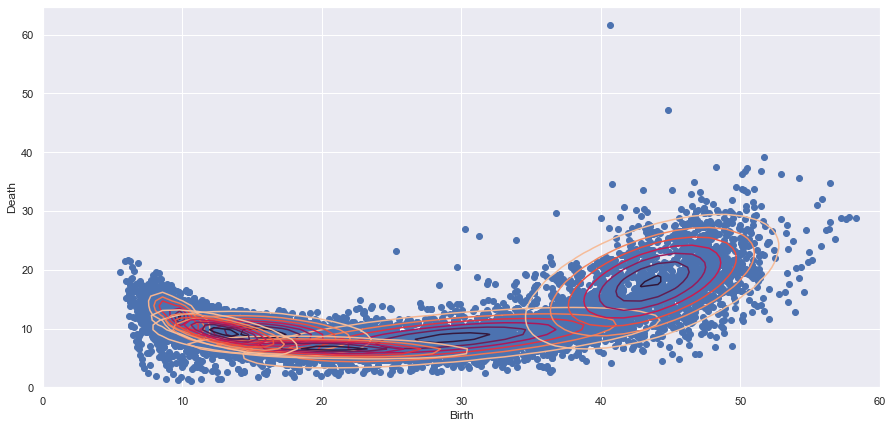

 ****  For number of clusters = 7
The estimated mu : 
 [[30.77976228  9.42725716]
 [ 9.75406267 12.05105793]
 [43.92778287 18.2711578 ]
 [14.97641883  9.26877819]
 [19.48874396  7.00468428]
 [12.94378218  9.40404004]
 [25.79747515  6.99128742]]

 The estimated alpha : 
 [0.13249537 0.24452707 0.13638471 0.11675839 0.13409596 0.1447046
 0.09103389]

 The estimated sigma :
  [[[67.98887132 17.21072619]
  [17.21072619  9.48436829]]

 [[ 1.25245478 -1.80234329]
  [-1.80234329  4.76199084]]

 [[19.77713127 13.48903776]
  [13.48903776 33.87148806]]

 [[13.02252066 -1.92375528]
  [-1.92375528  3.6543391 ]]

 [[23.36744936 -3.29828559]
  [-3.29828559  1.65645871]]

 [[ 6.32218576 -3.5746167 ]
  [-3.5746167   3.63634783]]

 [[49.16378181  3.6556061 ]
  [ 3.6556061   1.69228631]]]


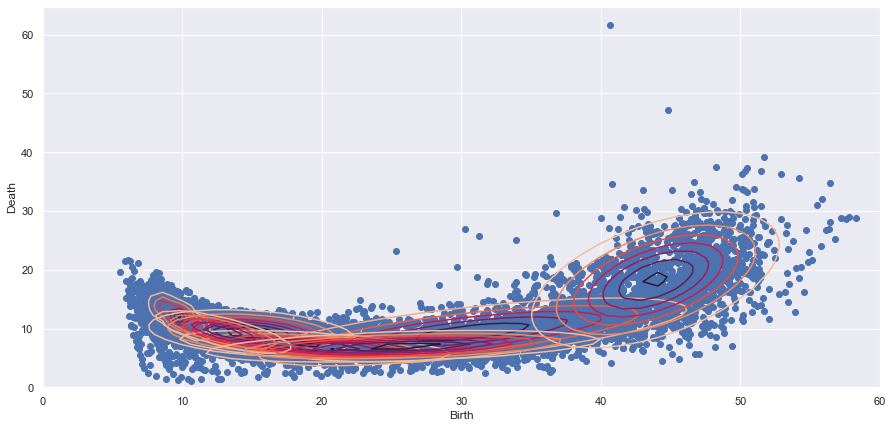

In [11]:
m = [2,3,4,5,6,7]  ## Chosen at random 

for i in m: 
    
    # Apply EM algorithm 
    alpha_em, mu_em, sigma_em, loglikelihood = EM(X, X.shape[0], i , 60)
    
    # Plot the result 
    print(' ****  For number of clusters =' , i )
    print('The estimated mu : \n', mu_em)
    print('\n The estimated alpha : \n', alpha_em)
    print('\n The estimated sigma :\n ', sigma_em)
    plot(X,mu_em,sigma_em, k = i,xmin = 0,xmax = 60 , ymin = 0, ymax = 40)

The best number of clusters is : 6


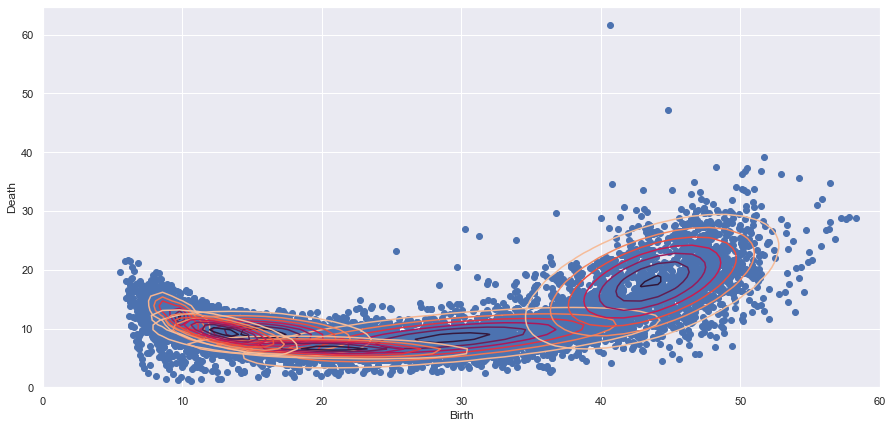

In [12]:
# Use the BIC estimator 
BIC = [] 
mu_list = []
sigma_list =[] 

for i in m: 
    
    alpha_em, mu_em, sigma_em, loglikelihood = EM(X, X.shape[0], i , 60)
    BIC.append( - loglikelihood[-1] + 0.5 * df(i) * np.log(n))
    mu_list.append(mu_em)
    sigma_list.append(sigma_em)
    
p = np.argmin(BIC)
BIC = m[p]
print('The best number of clusters is :' , BIC )
plot(X,mu_list[p],sigma_list[p], BIC,xmin = 0,xmax = 60 , ymin = 0, ymax = 40)

**Interpretation:** 

> From the previous result, we can say that the algorithm tries to estimate the Gaussians from the data. The means correspond mainly to the agglomeration of the points. Moreover, the BIC is useful because it allows us to choose among all the estimates the one that gives a better clustering performance. In this case, we found that the BIC is equal to $6$. 

## Ecercice 3: Importance sampling

### 3.A – Poor Importance Sampling

In [13]:
def f(x):
    
    aux = 2* np.sin(np.pi * x/1.5)
    if x >= 0 :
        return aux 
    else: 
        return 0    

def p(x): 
    
    aux = x**(1.65 - 1) * np.exp(-x**2/2)
    if x >= 0 :
        return aux 
    else: 
        return 0

## Parameters for function q
mu = 0.8
sigma = np.sqrt(1.5)

def q(x, mu, sigma):
    return (2/np.sqrt(2*np.pi*sigma**2))*np.exp(-((mu - x)**2)/(2*sigma**2))

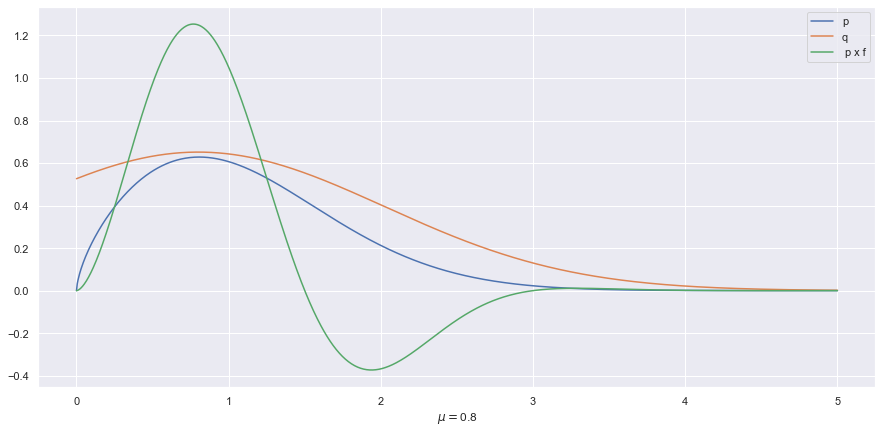

In [14]:
# Plotting the functions 

x = np.linspace(0, 5, 1000)
p_list = [p(x[i]) for i in range(len(x))]
q_list = [q(x[i], mu, sigma) for i in range(len(x))]
f_list = [f(x[i]) for i in range(len(x))]

plt.figure(figsize=(15,7))
plt.plot(x,p_list, label = 'p')
plt.plot(x,q_list, label = 'q')
plt.plot(x,np.array(p_list)*np.array(f_list), label = ' p x f')

plt.xlabel('$\mu = $' + str(mu))
plt.legend()
plt.show()

<font color = 'red'> 1. Implement a simple importance sampling procedure for the previous functions.<br> Be careful when sampling from q supported on R to discard any samples x < 0 when p is supported only for $ x \geq 0$.

> In this question, we will implement the importance sampling algorithm. We will first generate N samples with positive values. Then, we will calculate $E_q(f(x)) = \sum_i w_i f(x_i) $ where $w_i = \frac{p(x_i)}{q(x_i)}$.

In [15]:
def Importance_sampling(N, mu, sigma): 
    
    it = N 
    samples = []
    
    # Generates N samples Randomly 
    while it > 0 : 
        aux = np.random.normal(size=1,loc=mu,scale=sigma**2)
        if aux > 0 : 
            samples.append(aux)
            it -= 1
    
    # Sort their values 
    samples = sorted(samples)
    
    # Calculate the functions 
    p_list = [p(samples[i]) for i in range(len(samples))]
    q_list = [q(samples[i], mu, sigma) for i in range(len(samples))]
    f_list = [f(samples[i]) for i in range(len(samples))]
    
    # Compute the weights 
    w = [ p_list[i]/q_list[i] for i in range(len(samples))]
    w /= np.sum(w)
    
    # Compute the estimate 
    res = [w[i] * f_list[i] for i in range(len(samples))]
   
    return(np.sum(res) , w)

<font color = 'red'> 2. Compare the estimate and the importance weights for several sample size, N = 10, 100, 1000, 10000.

N =  10   ; the estimate =  1.0371144535949317
N =  100   ; the estimate =  0.8399070355150788
N =  1000   ; the estimate =  0.687954608359785
N =  5000   ; the estimate =  0.6716656263872102
N =  10000   ; the estimate =  0.6924241568143725


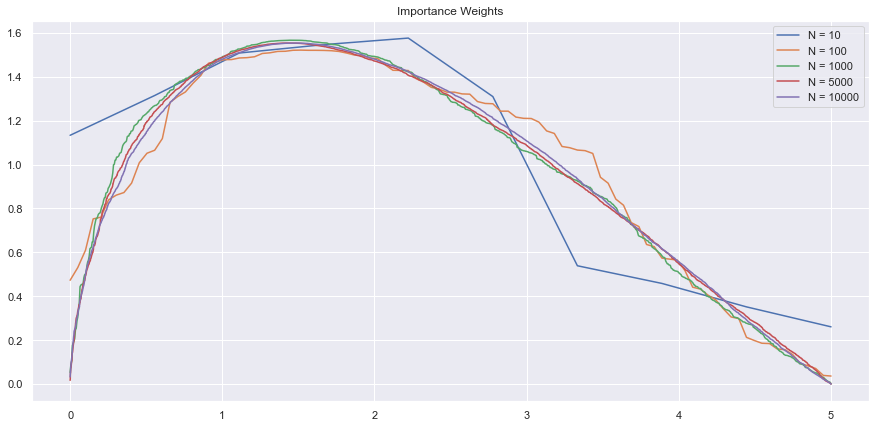

In [16]:
# List of sample sizes 
N = [10 ,100 ,1000, 5000, 10000]

plt.figure(figsize=(15,7))

# Ploting the importance weights and printing the estimates 
for n in N :
    res , w = Importance_sampling(n, mu, sigma)
    print('N = ', n , '  ; the estimate = ', res )
    plt.plot(np.linspace(0,5,len(w)), w*n , label = 'N = ' + str(n))

plt.title('Importance Weights')
plt.legend()
plt.show()

**Interpretation:** 

> From the previous plot, we can see that the importance weights curves show a lot of fluctuations for values of $N \leq 100 $. However, the plot becomes smoother for higher values. In addition, for these values, the values of the estimate become almost equal.  

<font color = 'red'>  3. Shift the mean of $q$, $\mu = 6$, so that the centers of mass for each distribution are far apart and repeat the experiment.

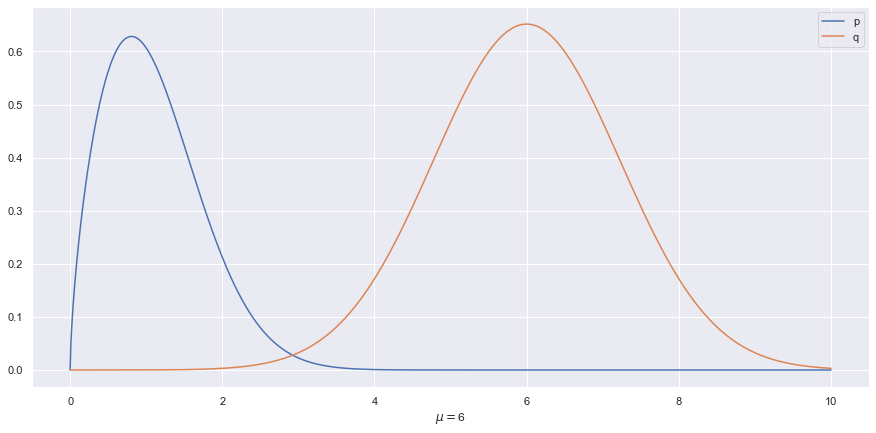

In [17]:
# Add a shift 
mu = 6

# Plot q and p functions 
x = np.linspace(0, 10, 1000)
p_list = [p(x[i]) for i in range(len(x))]
q_list = [q(x[i], mu, sigma) for i in range(len(x))]

plt.figure(figsize=(15,7))
plt.plot(x,p_list, label = 'p')
plt.plot(x,q_list, label = 'q')

plt.xlabel('$\mu = $' + str(mu))
plt.legend()
plt.show()

N =  10   ; the estimate =  -0.8877771463308975
N =  100   ; the estimate =  -1.8646462654540399
N =  1000   ; the estimate =  -1.5585743128595382
N =  5000   ; the estimate =  1.2421102719897037
N =  10000   ; the estimate =  1.0210729547197204


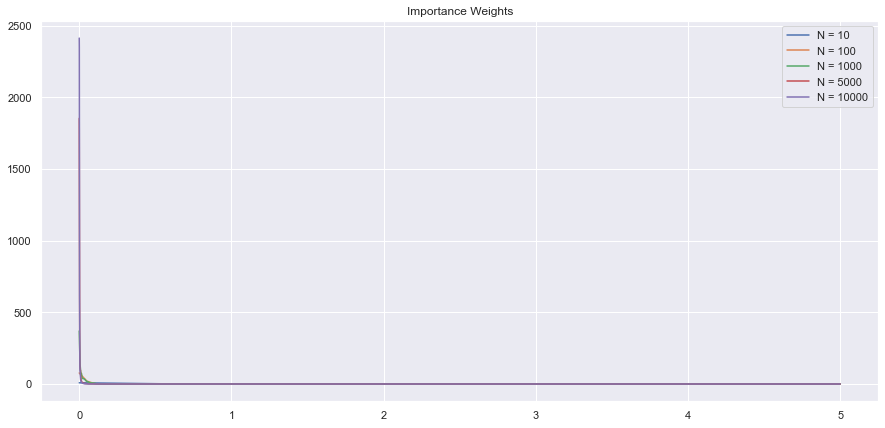

In [18]:
plt.figure(figsize=(15,7))

# Ploting the importance weights and printing the estimates 
for n in N :
    res , w = Importance_sampling(n, mu, sigma)
    print('N = ', n , '  ; the estimate = ', res )
    plt.plot(np.linspace(0,5,len(w)), w*n , label = 'N = ' + str(n))

plt.title('Importance Weights')
plt.legend()
plt.show()

**Interpretation:** 

> Here we notice that all weights are almost equal to zero. Indeed, $p$ and $q$ do not overlap which means that low values of $p$ correspond to high values of $q$ and vice versa. Moreover, we obtained a wrong estimation which indicates that this method, in the case of the shift of the mean, gives very bad estimation results with zero values for the importance weights. 

### 3.B – Adaptative Importance Sampling

<font color = 'red'>  4. Explain how the EM algorithm can be used to maximize the empirical criterion in step (iii) of the algorithm on page 6. Derive the parameters update.

>The answer of this question is extracted from this link:<br> https://hal.archives-ouvertes.fr/hal-00180669v4/document?fbclid=IwAR00s6OYPzeVo7YMZCbTJrap_K84pi5wm5OfchEDA32sgpg3bmdFQ8BrZvQ

> (iii) $\Longleftrightarrow$ Maximize $\sum_{i=1}^n \tilde{w_i}^{(0)} log (\sum_{j=1}^M \alpha_j \phi(X_i^{(0)};\theta_j)) $
<br><br>
> Which is an approximation for the step: Maximize $\int log(\sum_{i=1}^M \alpha_i \phi(x,\mu_i, \Sigma_i)) ~\nu(x)~ dx $
<br><br>
> This maximization formally resembles standard mixture maximum likelihood estimation but with an integration with respect to $\nu$ replacing the empirical sum over observations. 
<br><br>
>This analogy suggests that it is possible to maximize the previous criterion using the EM algorithm. However, the parameters changed to include the values of weights. 
<br><br>
>Thus, we have: <br><br>
$$\alpha_c = \frac{\sum_i r_{ic}\tilde{w_i}}{\sum_c \sum_i r_{ic}\tilde{w_i}}$$<br><br>
$$\mu_c = \frac{\sum_i r_{ic}\tilde{w_i} x_i}{\sum_i r_{ic}\tilde{w_i}}$$<br><br>
$$\sigma_c = \frac{\sum_i r_{ic}\tilde{w_i} (x_i - \mu_c)^T(x_i - \mu_c)}{\sum_i r_{ic}\tilde{w_i}}$$ <br><br>
<br><br>
>With $r_{ic} = \frac{\alpha_c \phi(x_i | \mu_c,\Sigma_c)}{\sum_{k=1}^K \alpha_k \phi(x_i | \mu_k,\Sigma_k)}$  <br><br>
Where: $\phi(x|\mu, \Sigma)$ describes the mulitvariate Gaussian.  <br><br>

### 3.C – Application to a "banana"-shaped density

<font color = 'red'>  5. Using the Adaptive Importance Sampling, write an algorithm which allows drawing samples from the density $\nu$ You may display the results for the banana-shaped density in the first two coordinates.

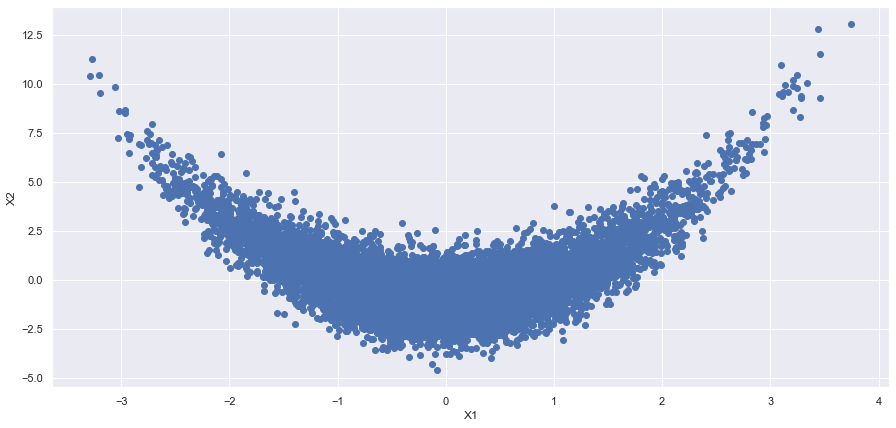

In [19]:
# Generates N points of the banana density 
def banana(sigma , b , d , n):
    
    Sigma = np.eye(d)
    Sigma[0,0] = sigma**2
    mu = np.zeros(d)
    
    sample = np.random.multivariate_normal(mu,Sigma,n)
    sample[:,1] += b*(sample[:,0]**2 - sigma**2) 
    
    return(sample)


# Data simulation 
def data_func(mu,sigma,alpha,n):
    
    X = np.zeros((1,2))
    size = int(n/mu.shape[0])
    
    for i in range(alpha.shape[0]):
        f = np.random.multivariate_normal(mu[i], sigma[i],size)
        X = np.concatenate((X,f) , axis = 0)
    
    return X 


# Parameters 
sigma = 1 
b = 1
d = 2
n = 10000


# Plot the X2 with respect to X1 
X = banana(sigma , b , d , n )
plt.figure(figsize=(15,7))
plt.scatter(X[:,0],X[:,1])
plt.ylabel('X2')
plt.xlabel('X1')
plt.show()

In [20]:
# Function p 
def p(X, sigma, d, b):
    
    # Sigma 
    Sigma = np.eye(d)
    Sigma[0,0] = sigma**2
    
    # Null means 
    mu = np.zeros(d)
    
    # Generates density  
    sample = X.copy()
    sample[:,1] -= b*(sample[:,0]**2 - sigma**2) 
    sample = scipy.stats.multivariate_normal.pdf(sample, mu, Sigma , allow_singular =True)
    
    return(sample)


# function q 
def q(X, alpha, mu, sigma) : 
    
    aux = np.zeros((X.shape[0], alpha.shape[0]))
    
    for j in range(alpha.shape[0]):
        f = scipy.stats.multivariate_normal.pdf(X, mu[j], sigma[j] , allow_singular =True)
        aux[:,j] = alpha[j] * f
    
    return(np.sum(aux, axis = 1))


# function to compute weights 
def weight(X,alpha,mu,Sigma,sigma,d,b):
    
    p_prob = p(X, sigma, d, b)    
    q_prob = q(X , alpha, mu, Sigma)
    
    w = p_prob/q_prob 
    w /= np.sum(w)

    return w


# Modified M-step 
def M_step_IS(X, aux, w):

    for c in range(aux.shape[1]):
        aux[:,c] = aux[:,c] * w 
        
    # Compute alpha 
    alpha = np.sum(aux, axis = 0)
    
    # Compute mu
    mu = []
    for c in range(aux.shape[1]) : 
        mu.append(np.sum(aux[:,c].reshape(-1,1)*X, axis = 0)/alpha[c])
    mu = np.array(mu)
    
    # Compute sigma 
    sigma = [] 
    for c in range(aux.shape[1]) :
        sig  = ((aux[:,c].reshape(-1,1)*(X-mu[c])).T@(X-mu[c]))/aux[:,c].sum()
        sigma.append(sig)
    sigma = np.array(sigma) 
    
    # Normalize alpha 
    alpha /= np.sum(alpha)
        
    return alpha, mu, sigma

    
# The modified EM-algorithm 
def EM_IS (sigma, d, b, m, n_iter):
    
    # Initialize alpha 
    alpha = np.ones(m) / m
    
    # Initialize mu 
    np.random.seed(0)
    mu = np.random.randint(-2,2 ,(m,d))

    # Initialize sigma 
    l = []
    Sigma = np.eye(2)    
    for i in range(m):
        l.append(Sigma) 
    Sigma = np.array(l)    
        
    # Iterations 
    for i in range(n_iter):    
        
        X = data_func(mu,Sigma,alpha,n)
        w  = weight(X,alpha,mu,Sigma,sigma,d,b)
        aux = E_step(X, alpha, mu, Sigma)
        alpha, mu, Sigma = M_step_IS(X, aux, w)
        
    return alpha, mu, Sigma     

alpha =  [0.27575823 0.43431936 0.28992242]
mu =  [[-1.17479731  0.73732996]
 [-0.02314767 -0.67916113]
 [ 1.0967272   0.50989074]]
sigma =
 [[[ 0.38837153 -1.12079393]
  [-1.12079393  4.16973409]]

 [[ 0.32583794 -0.01809213]
  [-0.01809213  0.90795648]]

 [[ 0.324006    0.82413769]
  [ 0.82413769  2.96871486]]]


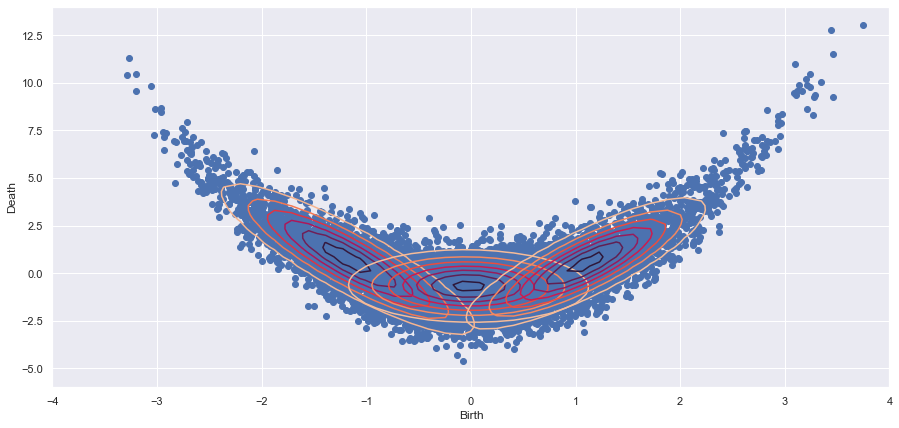

In [24]:
# Apply the EM algorithm 
alpha_new, mu_new, sigma_new = EM_IS (sigma, d, b, 3 , 30)

# Print the estimated parameters 
print('alpha = ' , alpha_new)
print('mu = ', mu_new)
print('sigma =\n', sigma_new )

plot(X, mu_new, sigma_new, 3 ,xmin = -4, xmax = 4 , ymin = -6 , ymax = 6)

**Interpretation:**

> From the previous result, we can conclude that the modified EM algorithm attempts to find the distribution of Gaussians in the banana plot. In the end, it succeeds in estimating the centeral points and finding the correct Gaussian to estimate their distribution. I think in this case we should try changing the number of Gaussians and find the best fit for the data. 